#  Binary Prediction On Mushrooms

In [89]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,mean_absolute_error

In [43]:
# reading the csv file
df = pd.read_csv('train_mushroom.csv')

In [44]:
df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [45]:
# checking data types of each column 
df.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

### EDA

In [46]:
# checking null values
null_df = df.isnull().sum()
null_df

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [47]:
# percentage null values compared to the total Data points
null_df_percent = (null_df/df.shape[0])*100
null_df_percent

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [48]:
df = df.drop(['veil-type','veil-color','spore-print-color','stem-root','stem-surface','id'],axis=1)

Numerical Columns

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


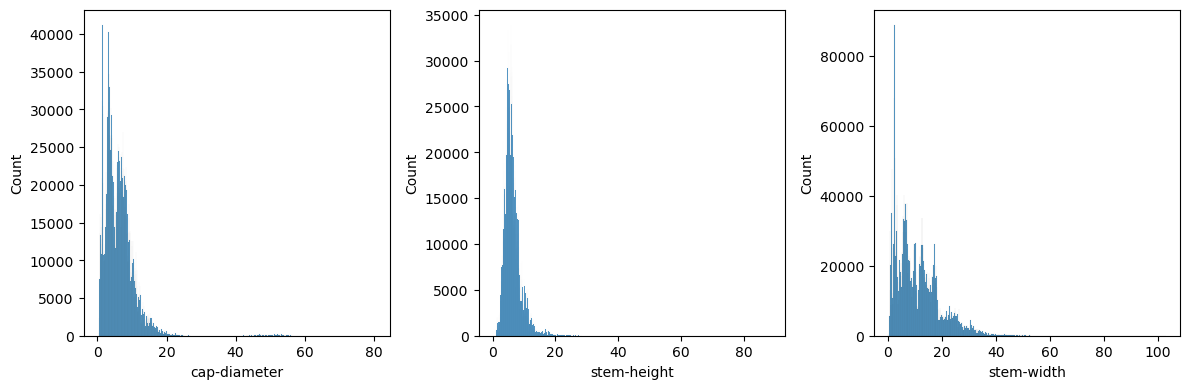

In [49]:
# checking distribution of datas for numerical columns
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.histplot(data=df,x='cap-diameter',ax=ax[0])
sns.histplot(data=df,x='stem-height',ax=ax[1])
sns.histplot(data=df,x='stem-width',ax=ax[2])
plt.tight_layout()

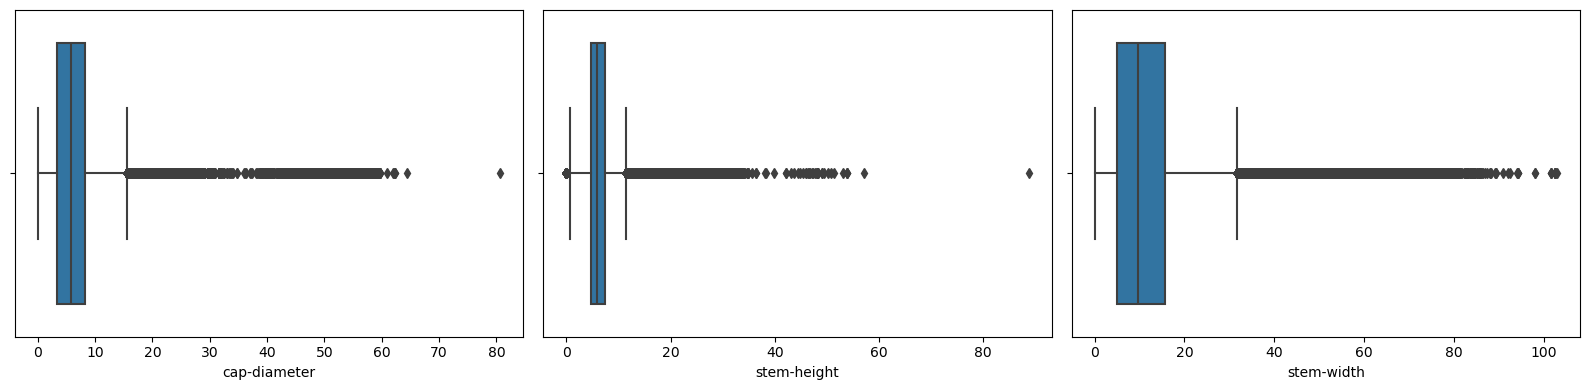

In [50]:
# checking the box-plot for further confirmation
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.boxplot(data=df,x='cap-diameter',ax=ax[0])
sns.boxplot(data=df,x='stem-height',ax=ax[1])
sns.boxplot(data=df,x='stem-width',ax=ax[2])
plt.tight_layout()

In [51]:
# checking percentiles
summary = df.describe(percentiles=[0.6,0.7,0.75,0.80,0.85,0.87,0.88,0.9,0.91,0.92,0.93])
summary

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
60%,6.720000e+00,6.300000e+00,1.217000e+01
70%,7.690000e+00,7.020000e+00,1.415000e+01
75%,8.240000e+00,7.410000e+00,1.563000e+01
80%,8.920000e+00,7.960000e+00,1.712000e+01
85%,9.820000e+00,8.500000e+00,1.845000e+01


In [52]:
# IQR for removing outliers
def filter_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_filter = ['cap-diameter', 'stem-height', 'stem-width']

# Apply the IQR filter
df = filter_outliers_iqr(df, columns_to_filter)


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


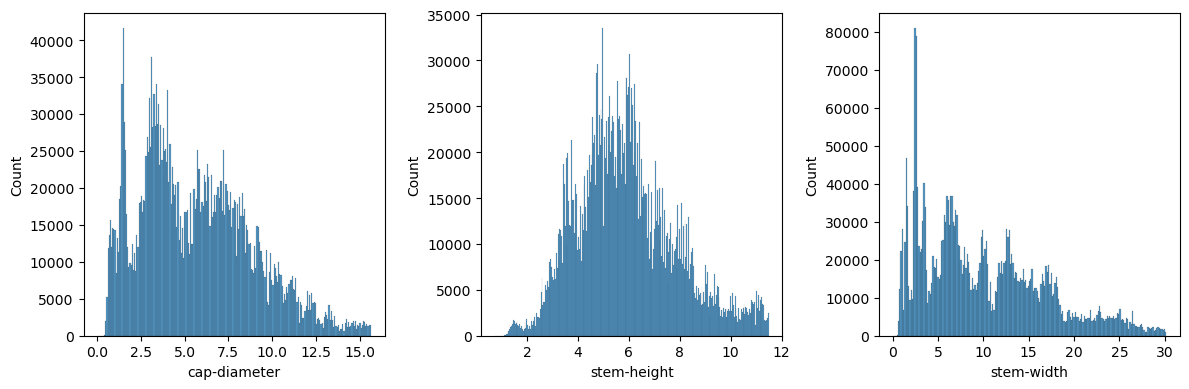

In [53]:
# checking distribution of datas for numerical columns after removing outliers
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.histplot(data=df,x='cap-diameter',ax=ax[0])
sns.histplot(data=df,x='stem-height',ax=ax[1])
sns.histplot(data=df,x='stem-width',ax=ax[2])
plt.tight_layout()

In [54]:
df.isnull().sum()

class                         0
cap-diameter                  0
cap-shape                    38
cap-surface              642707
cap-color                    12
does-bruise-or-bleed          7
gill-attachment          491311
gill-spacing            1112466
gill-color                   52
stem-height                   0
stem-width                    0
stem-color                   35
has-ring                     23
ring-type                118479
habitat                      41
season                        0
dtype: int64

In [55]:
# def evaluate_and_plot_polynomial_degrees(df, target_column, max_degree=2, test_size=0.2, random_state=42):

#     numerical_df = df.select_dtypes(include=['number'])
    
#     target = df[target_column].map({'e': 1, 'p': 0})
    
#     X_train, X_test, y_train, y_test = train_test_split(numerical_df, target, test_size=test_size, random_state=random_state)
    
#     degrees = []
#     train_accuracy_scores = []
#     test_accuracy_scores = []
    
#     for degree in range(1, max_degree + 1):
  
#         poly = PolynomialFeatures(degree=degree)
#         X_train_poly = poly.fit_transform(X_train)
#         X_test_poly = poly.fit_transform(X_test)
        
#         model = LogisticRegression(max_iter=10000,n_jobs=-1)  
#         model.fit(X_train_poly, y_train)
        
#         y_train_pred = model.predict(X_train_poly)
#         y_test_pred = model.predict(X_test_poly)
        
#         train_accuracy = accuracy_score(y_train, y_train_pred)
#         test_accuracy = accuracy_score(y_test, y_test_pred)
        
#         degrees.append(degree)
#         train_accuracy_scores.append(train_accuracy)
#         test_accuracy_scores.append(test_accuracy)
        
#         print(f"Degree {degree}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")

#     plt.figure(figsize=(10, 6))
#     plt.plot(degrees, train_accuracy_scores, marker='o', linestyle='-', color='b', label='Train Accuracy')
#     plt.plot(degrees, test_accuracy_scores, marker='o', linestyle='-', color='r', label='Test Accuracy')
#     plt.title('Polynomial Degree vs. Model Accuracy')
#     plt.xlabel('Polynomial Degree')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# evaluate_and_plot_polynomial_degrees(df, target_column='class')

we can see a increase in accuracy using degree=2. so we will use degree=2

In [56]:
def add_polynomial_features(df, degree):
    numerical_df = df.select_dtypes(include='number')
    imputer = SimpleImputer(strategy='mean')
    numerical_df_imputed = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns)
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(numerical_df_imputed)
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(numerical_df_imputed.columns))
    
    non_numerical_df = df.select_dtypes(exclude='number')
    non_numerical_df = non_numerical_df.reset_index(drop=True)
    poly_df = poly_df.reset_index(drop=True)
    
    combined_df = pd.concat([non_numerical_df, poly_df], axis=1)
    
    return combined_df

# Apply the function
poly_df = add_polynomial_features(df, degree=2)

In [57]:
poly_df.isnull().sum()

class                             0
cap-shape                        38
cap-surface                  642707
cap-color                        12
does-bruise-or-bleed              7
gill-attachment              491311
gill-spacing                1112466
gill-color                       52
stem-color                       35
has-ring                         23
ring-type                    118479
habitat                          41
season                            0
cap-diameter                      0
stem-height                       0
stem-width                        0
cap-diameter^2                    0
cap-diameter stem-height          0
cap-diameter stem-width           0
stem-height^2                     0
stem-height stem-width            0
stem-width^2                      0
dtype: int64

Categorical Columns

In [58]:
# list of categorical columns
cat_col = list(poly_df.select_dtypes(include='object').columns)
cat_col

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [59]:
# checking no of unique values in each columns
for c in cat_col:
    print(f'{c}: {poly_df[c].nunique()}')

class: 2
cap-shape: 69
cap-surface: 77
cap-color: 73
does-bruise-or-bleed: 26
gill-attachment: 72
gill-spacing: 45
gill-color: 62
stem-color: 56
has-ring: 22
ring-type: 36
habitat: 50
season: 4


<Axes: xlabel='class', ylabel='count'>

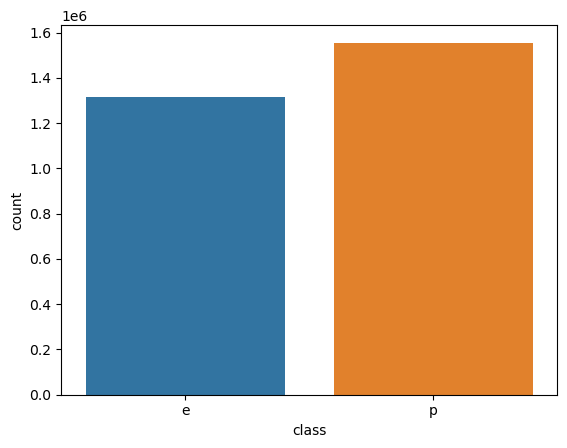

In [60]:
# class column (target variable)
sns.countplot(data=poly_df,x='class')

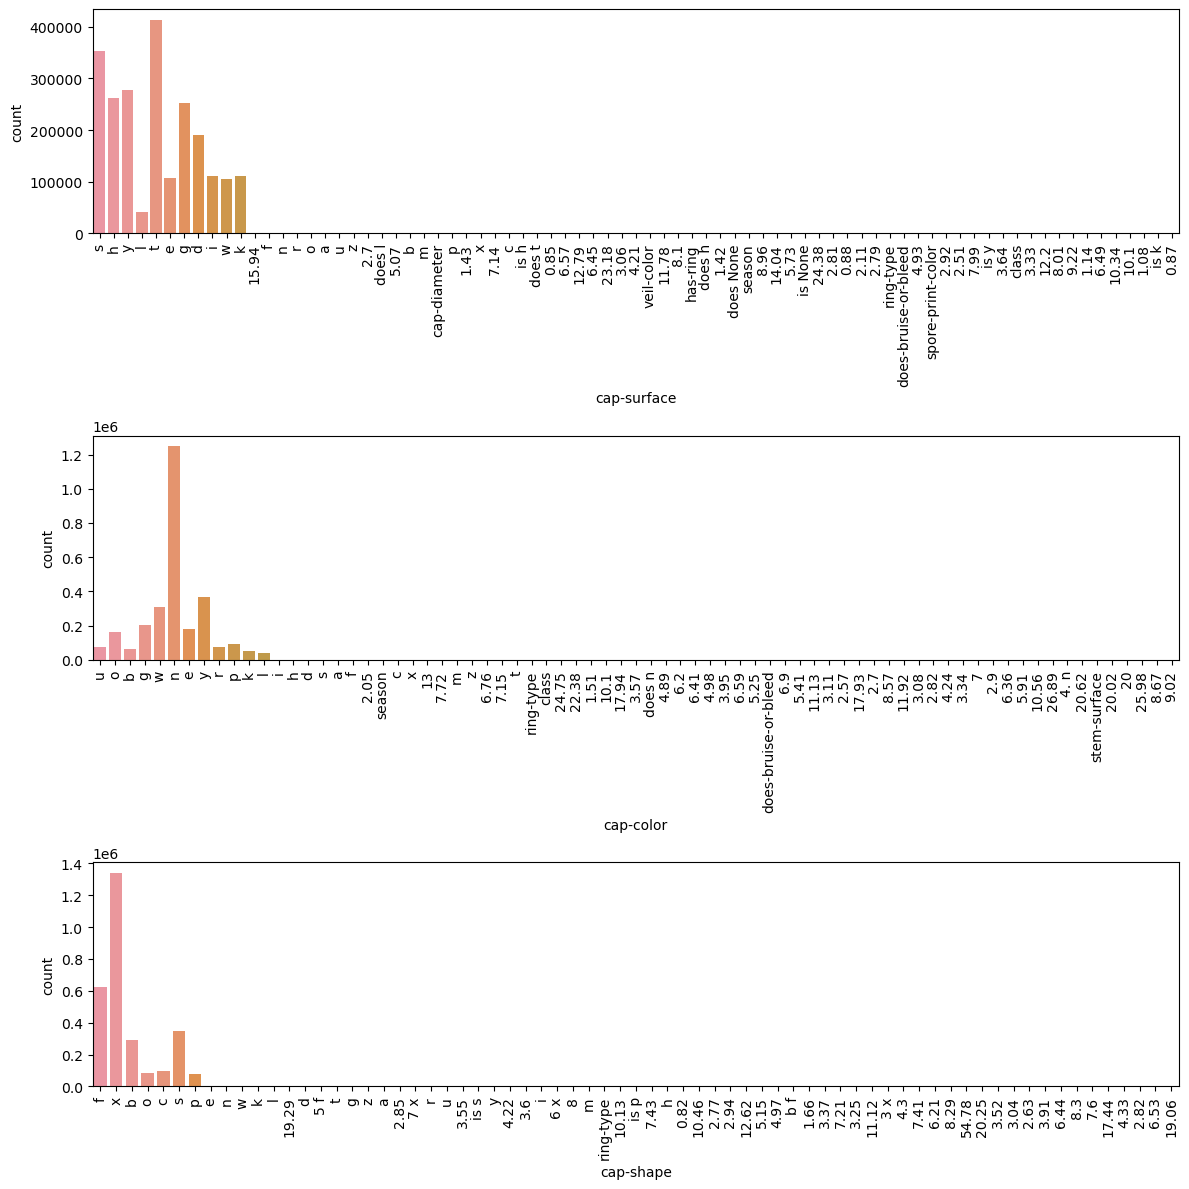

In [61]:
# cap% 
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
sns.countplot(data=poly_df,x='cap-surface',ax=ax[0])
sns.countplot(data=poly_df,x='cap-color',ax=ax[1])
sns.countplot(data=poly_df,x='cap-shape',ax=ax[2])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
plt.tight_layout()

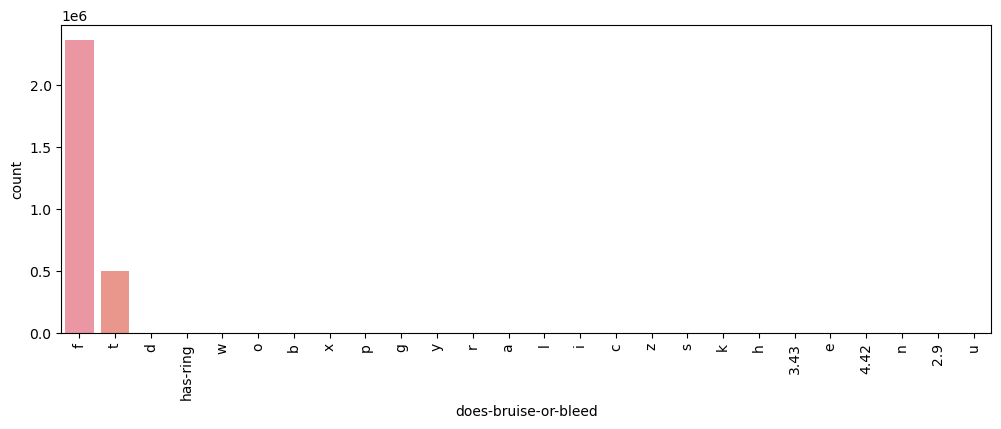

In [62]:
# does-bruise-or-bleed
plt.figure(figsize=(12,4))
sns.countplot(data=poly_df,x='does-bruise-or-bleed')
_ = plt.xticks(rotation=90)

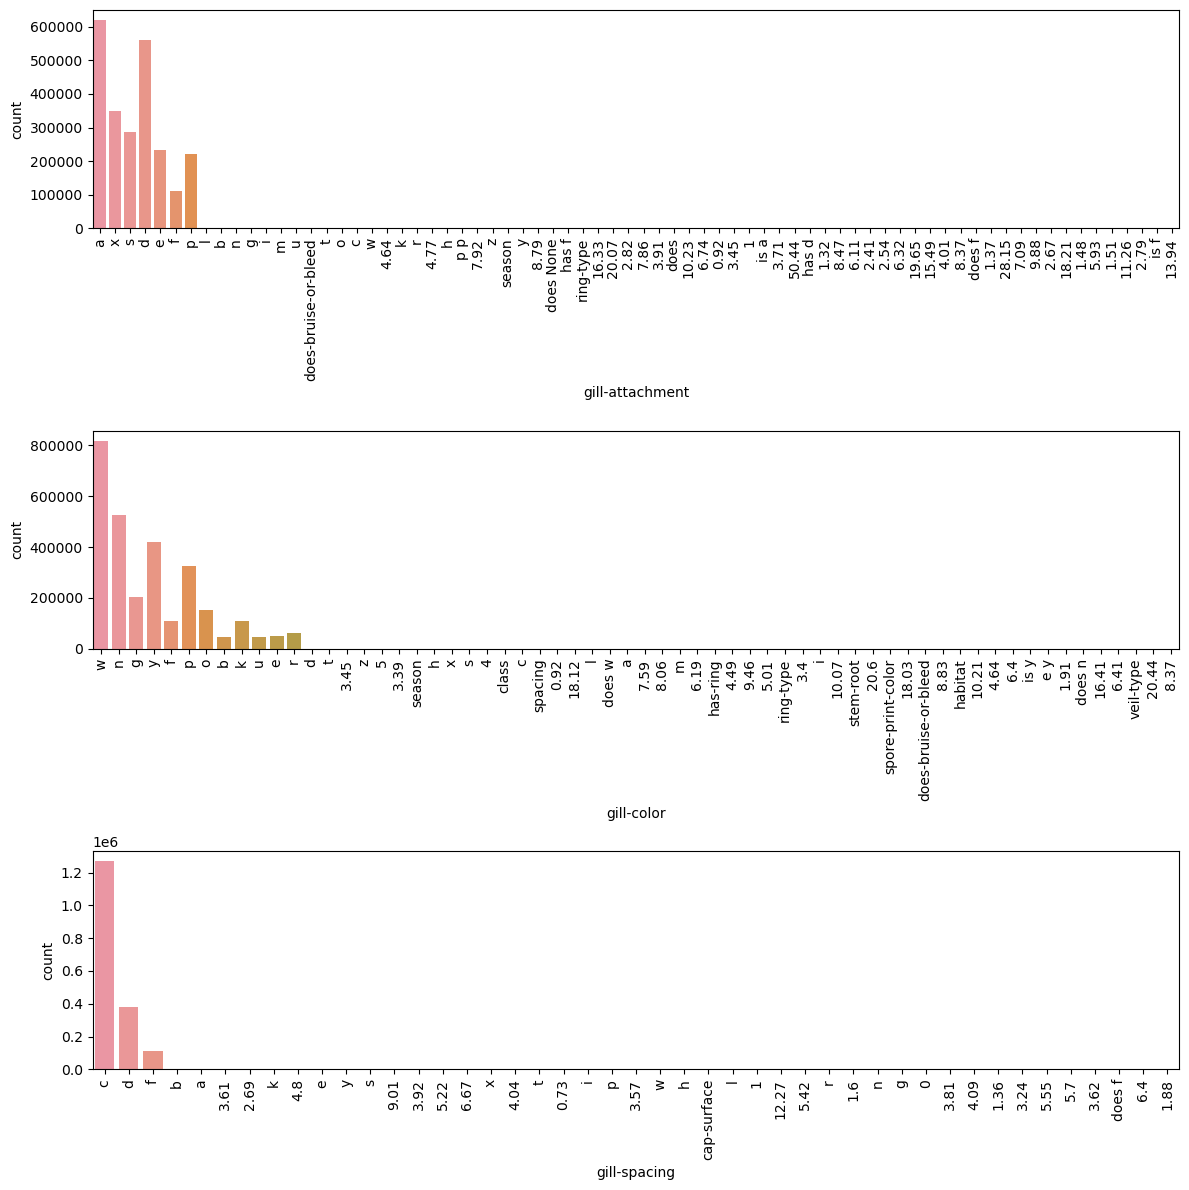

In [63]:
# gill%
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
sns.countplot(data=poly_df,x='gill-attachment',ax=ax[0])
sns.countplot(data=poly_df,x='gill-color',ax=ax[1])
sns.countplot(data=poly_df,x='gill-spacing',ax=ax[2])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
plt.tight_layout()

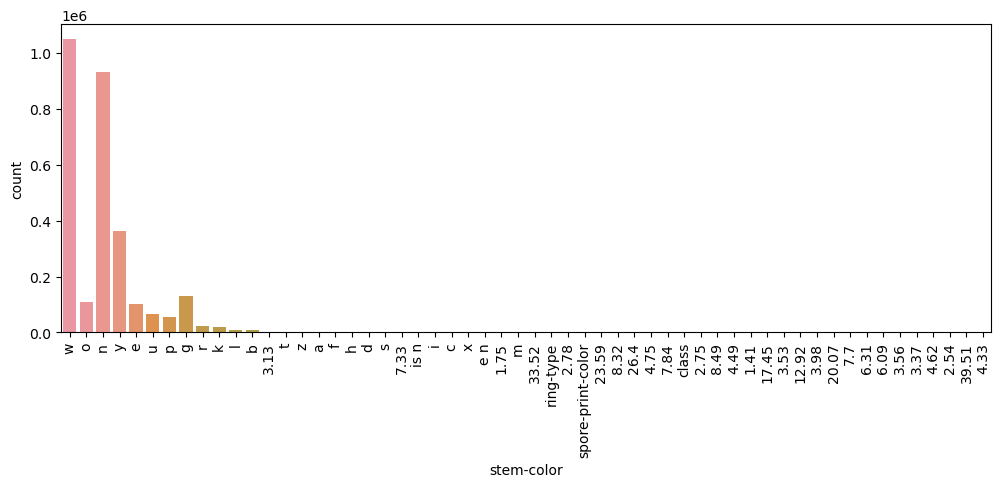

In [64]:
# stem-color
plt.figure(figsize=(12,4))
sns.countplot(data=poly_df,x='stem-color')
_ = plt.xticks(rotation=90)

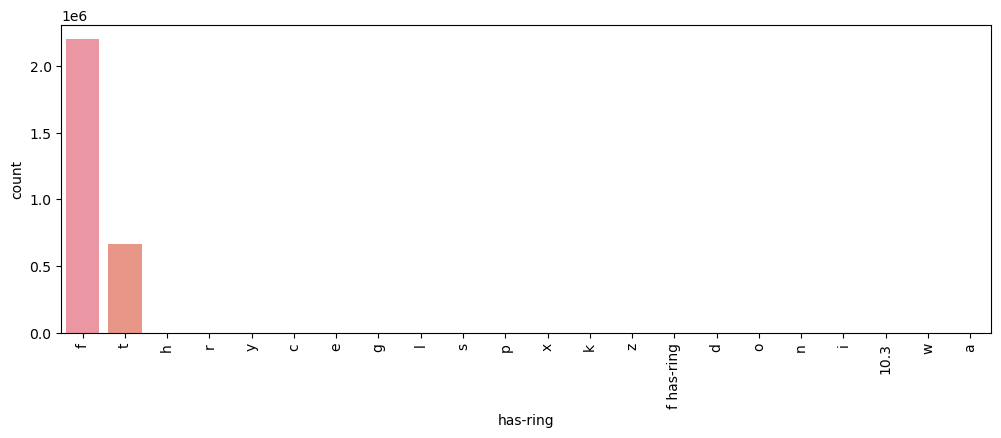

In [65]:
# has-ring
plt.figure(figsize=(12,4))
sns.countplot(data=poly_df,x='has-ring')
_ = plt.xticks(rotation=90)

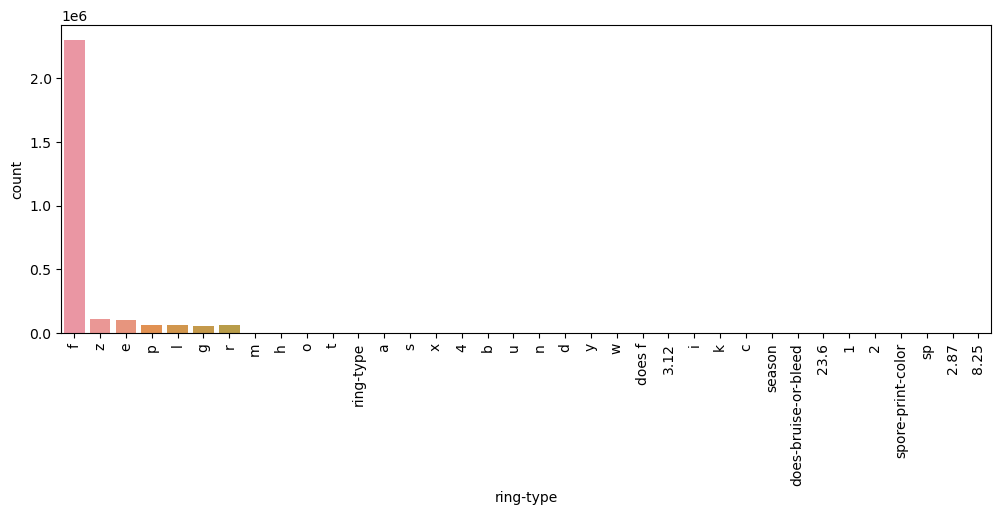

In [66]:
# ring-type
plt.figure(figsize=(12,4))
sns.countplot(data=poly_df,x='ring-type')
_ = plt.xticks(rotation=90)

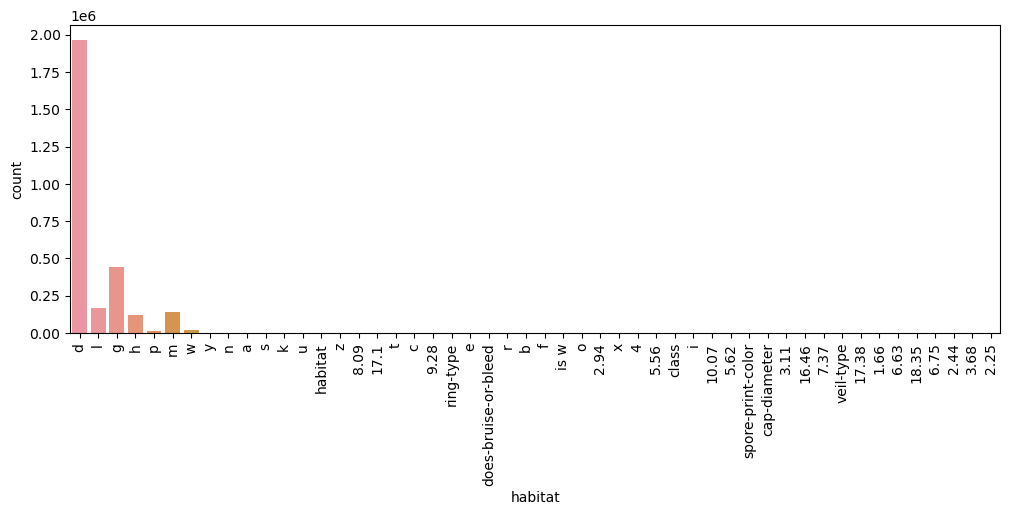

In [67]:
# habitat
plt.figure(figsize=(12,4))
sns.countplot(data=poly_df,x='habitat')
_ = plt.xticks(rotation=90)

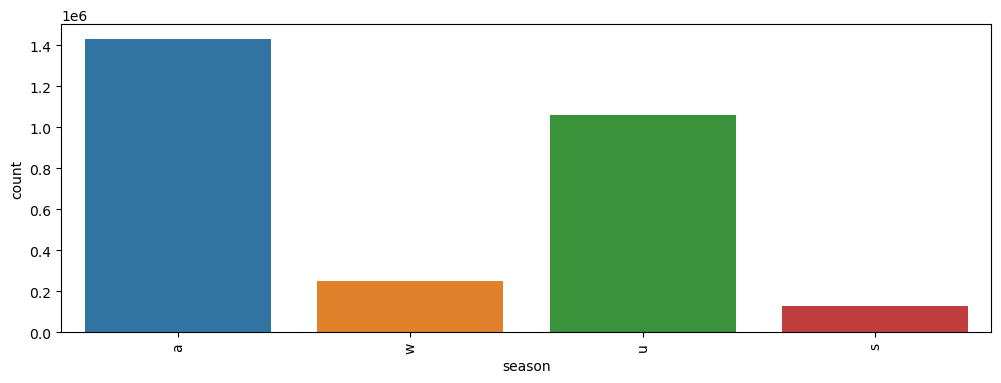

In [68]:
# season
plt.figure(figsize=(12,4))
sns.countplot(data=poly_df,x='season')
_ = plt.xticks(rotation=90)

In [69]:
detailed_values = {
    'cap-shape': {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'sunken': 's', 'spherical': 'p', 'others': 'o'},
    'cap-surface': {'fibrous': 'i', 'grooves': 'g', 'scaly': 'y', 'smooth': 's', 'shiny': 'h', 'leathery': 'l', 'silky': 'k', 'sticky': 't', 'wrinkled': 'w', 'fleshy': 'e'},
    'cap-color': {'brown': 'n', 'buff': 'b', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y', 'blue': 'l', 'orange': 'o', 'black': 'k'},
    'does-bruise-or-bleed': {'bruises-or-bleeding': 't', 'no': 'f'},
    'gill-attachment': {'adnate': 'a', 'adnexed': 'x', 'decurrent': 'd', 'free': 'e', 'sinuate': 's', 'pores': 'p', 'none': 'f', 'unknown': '?'},
    'gill-spacing': {'close': 'c', 'distant': 'd', 'none': 'f'},
    'gill-color': {'brown': 'n', 'buff': 'b', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y', 'blue': 'l', 'orange': 'o', 'black': 'k', 'none': 'f'},
    #'stem-root': {'bulbous': 'b', 'swollen': 's', 'club': 'c', 'cup': 'u', 'equal': 'e', 'rhizomorphs': 'z', 'rooted': 'r'},
    #'stem-surface': {'fibrous': 'i', 'grooves': 'g', 'scaly': 'y', 'smooth': 's', 'shiny': 'h', 'leathery': 'l', 'silky': 'k', 'sticky': 't', 'wrinkled': 'w', 'fleshy': 'e', 'none': 'f'},
    'stem-color': {'brown': 'n', 'buff': 'b', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y', 'blue': 'l', 'orange': 'o', 'black': 'k', 'none': 'f'},
    #'veil-type': {'partial': 'p', 'universal': 'u'},
    #'veil-color': {'brown': 'n', 'buff': 'b', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y', 'blue': 'l', 'orange': 'o', 'black': 'k', 'none': 'f'},
    'has-ring': {'ring': 't', 'none': 'f'},
    'ring-type': {'cobwebby': 'c', 'evanescent': 'e', 'flaring': 'r', 'grooved': 'g', 'large': 'l', 'pendant': 'p', 'sheathing': 's', 'zone': 'z', 'scaly': 'y', 'movable': 'm', 'none': 'f', 'unknown': '?'},
    #'spore-print-color': {'brown': 'n', 'buff': 'b', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y', 'blue': 'l', 'orange': 'o', 'black': 'k'},
    'habitat': {'grasses': 'g', 'leaves': 'l', 'meadows': 'm', 'paths': 'p', 'heaths': 'h', 'urban': 'u', 'waste': 'w', 'woods': 'd'},
    'season': {'spring': 's', 'summer': 'u', 'autumn': 'a', 'winter': 'w'}
}

# Replace invalid values with 'uk' for each column
for column, valid_chars in detailed_values.items():
    valid_full_and_short = set(valid_chars.values()).union(set(valid_chars.keys()))
    mask = ~poly_df[column].isin(valid_full_and_short)
    poly_df.loc[mask, column] = 'uk'

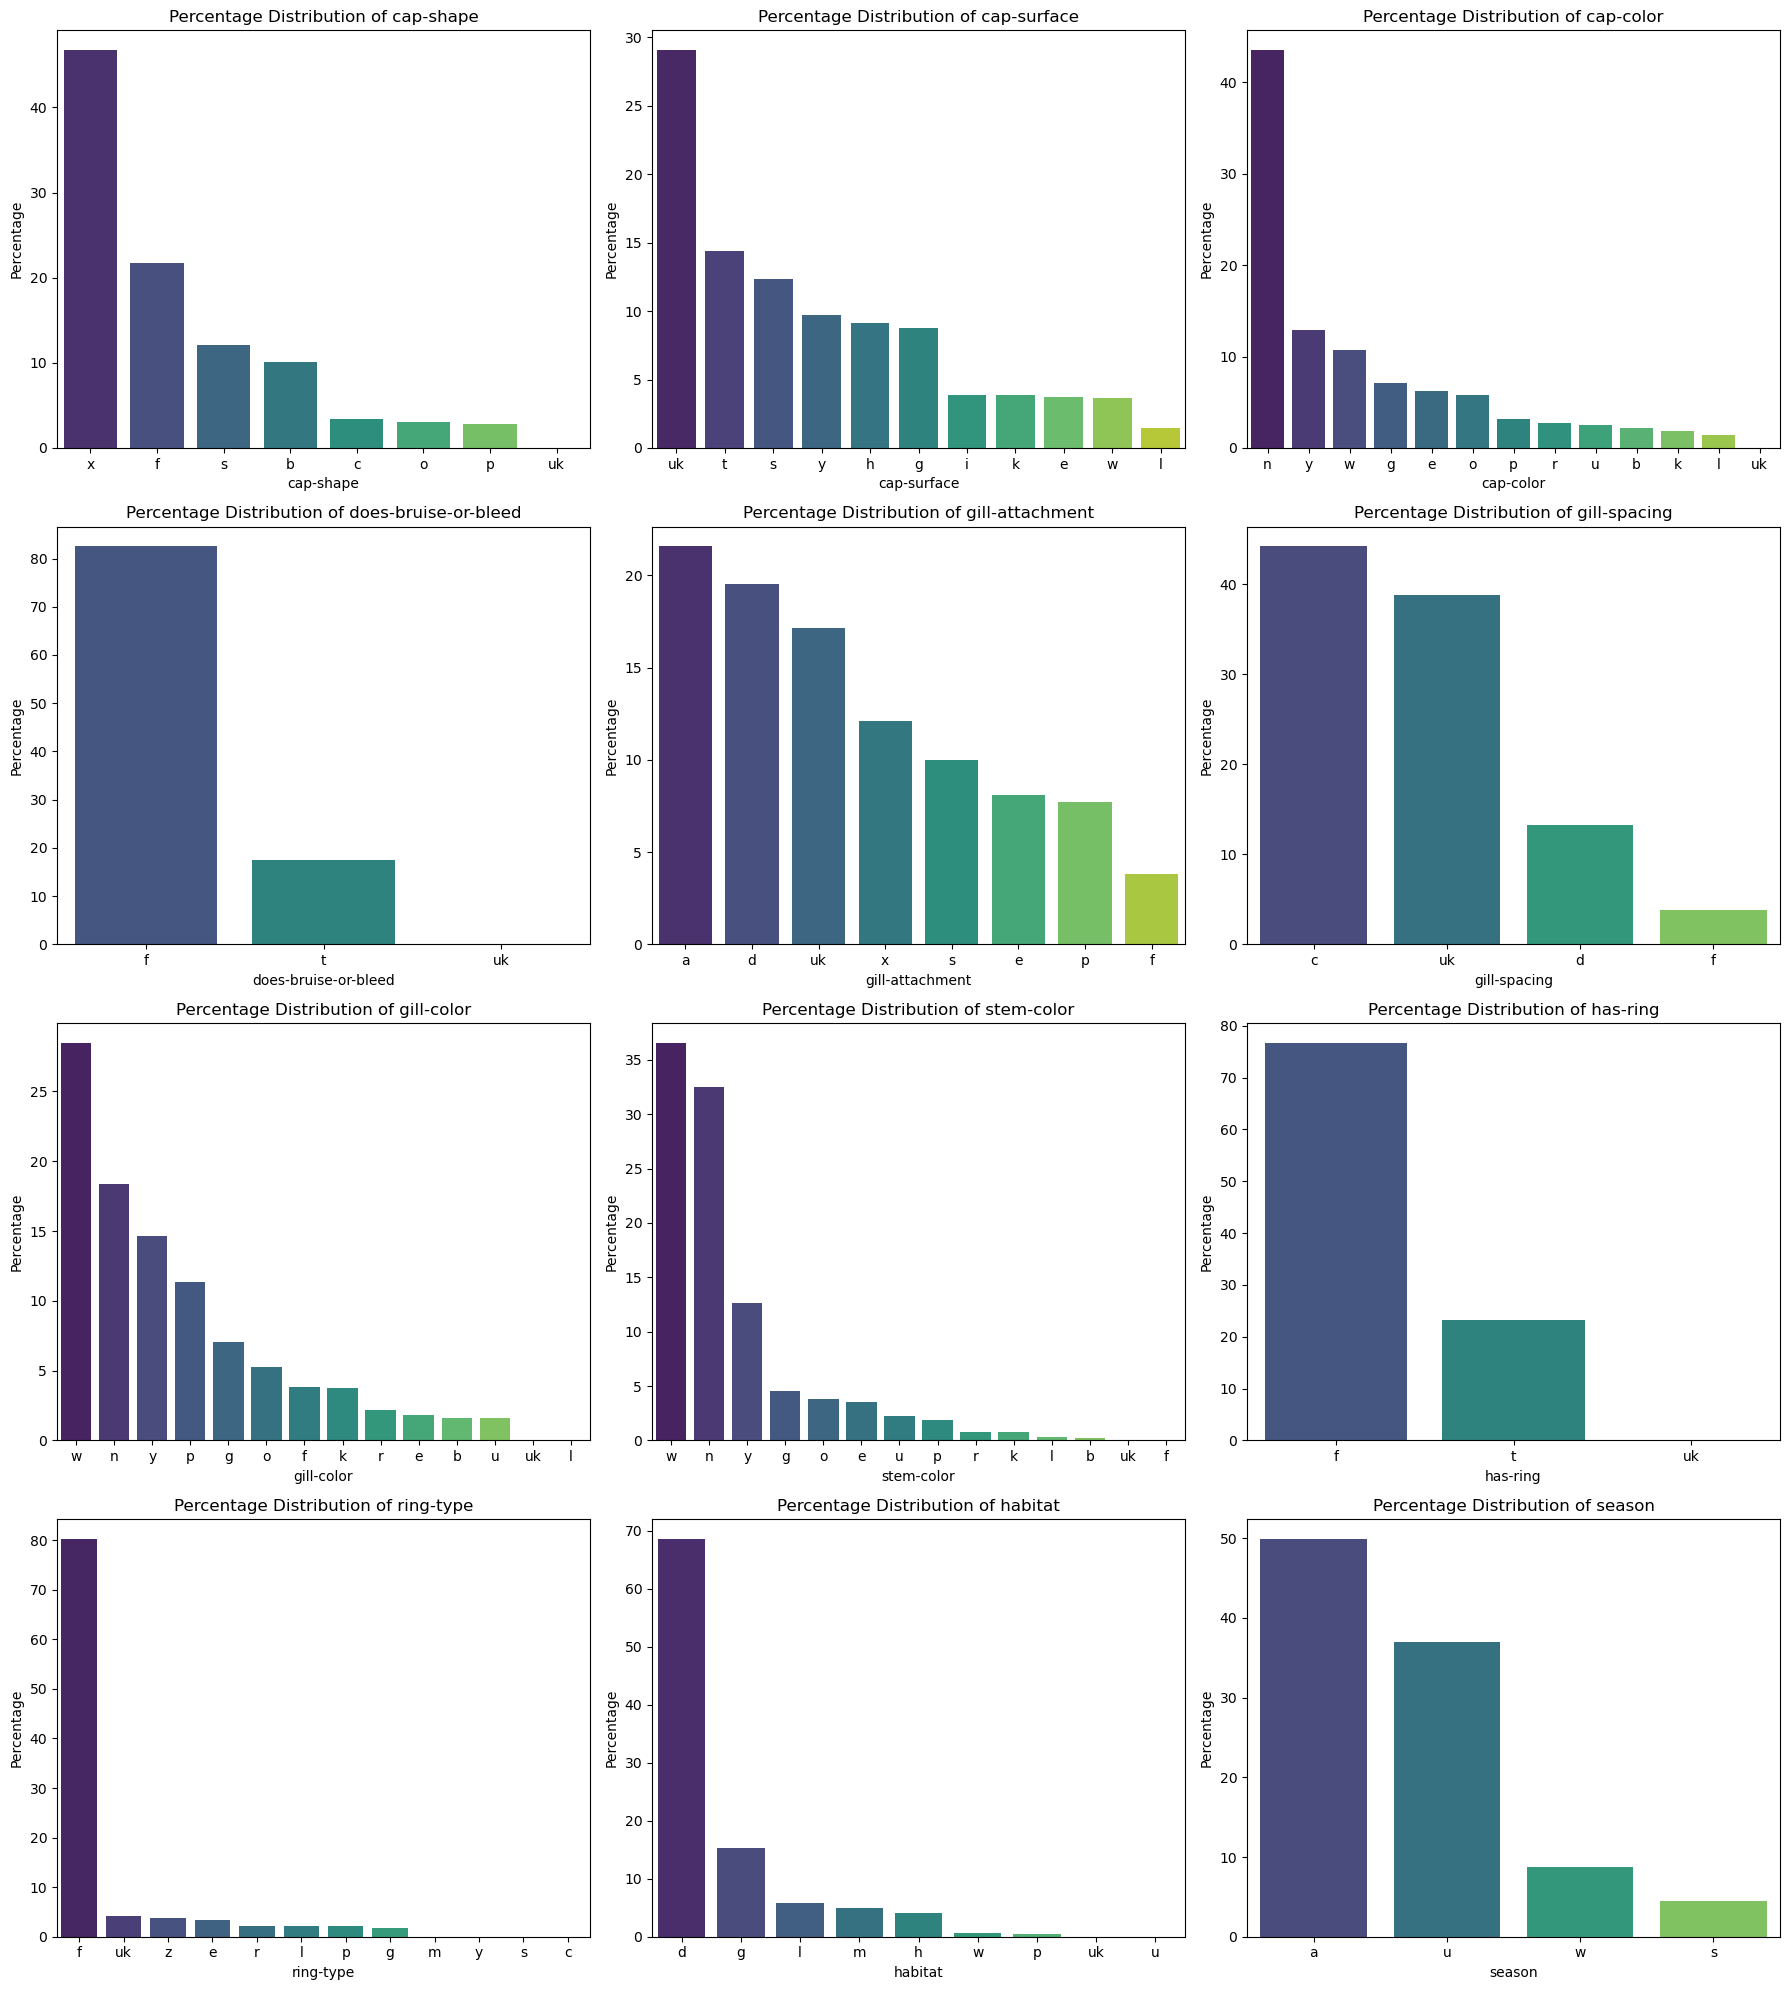

In [70]:
num_columns = len(detailed_values)
num_rows = (num_columns + 2) // 3 
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))

axes = axes.flatten()

# Plotting each column
for i, (column, valid_chars) in enumerate(detailed_values.items()):
    column_per = poly_df[column].value_counts(normalize=True) * 100
    column_df = column_per.reset_index()
    column_df.columns = [column, 'Percentage']
    
    # Plot
    sns.barplot(x=column, y='Percentage', data=column_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Percentage Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

In [71]:
# finding missing("uk") values
cat_col = list(poly_df.select_dtypes(include='object').columns)
for c in cat_col:
    print(f'{c}:{(poly_df[c] == "uk").sum()}')

class:0
cap-shape:484
cap-surface:834024
cap-color:347
does-bruise-or-bleed:105
gill-attachment:491769
gill-spacing:1112594
gill-color:411
stem-color:281
has-ring:124
ring-type:118772
habitat:440
season:0


In [72]:
for c in cat_col:
    uk_proportion = (poly_df[c] == "uk").sum() / len(poly_df)
    print(f'{c}: {uk_proportion:.2%}')

class: 0.00%
cap-shape: 0.02%
cap-surface: 29.07%
cap-color: 0.01%
does-bruise-or-bleed: 0.00%
gill-attachment: 17.14%
gill-spacing: 38.78%
gill-color: 0.01%
stem-color: 0.01%
has-ring: 0.00%
ring-type: 4.14%
habitat: 0.02%
season: 0.00%


In [73]:
poly_df.shape

(2869015, 22)

### Data Preprocessing

In [74]:
# cat_col = poly_df.select_dtypes(include='object').columns

# # Create an imputer object with strategy 'most_frequent'
# imputer = SimpleImputer(strategy='most_frequent')

# # Apply the imputer to each categorical column
# for column in cat_col:
#     poly_df[column] = imputer.fit_transform(poly_df[[column]].values.reshape(-1, 1)).ravel()

In [75]:
# encoding columns

cat_col = [col for col in poly_df.select_dtypes(include='object').columns if col != 'class']

one_hot_encoded_df = pd.get_dummies(poly_df, columns=cat_col, drop_first=True)

poly_df = one_hot_encoded_df

In [76]:
poly_df.columns

Index(['class', 'cap-diameter', 'stem-height', 'stem-width', 'cap-diameter^2',
       'cap-diameter stem-height', 'cap-diameter stem-width', 'stem-height^2',
       'stem-height stem-width', 'stem-width^2',
       ...
       'habitat_h', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_uk', 'habitat_w', 'season_s', 'season_u', 'season_w'],
      dtype='object', length=101)

In [77]:
X = poly_df.drop('class',axis=1)
y = poly_df['class']

In [78]:
X = pd.DataFrame(X.astype(int))

In [79]:
X.head()

,cap-diameter,stem-height,stem-width,cap-diameter^2,cap-diameter stem-height,cap-diameter stem-width,stem-height^2,stem-height stem-width,stem-width^2,cap-shape_c,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_uk,habitat_w,season_s,season_u,season_w
0,8,4,15,77,39,135,20,69,236,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,6,20,21,29,22,31,41,0,...,0,0,0,0,0,0,0,0,0,1
2,6,6,9,48,47,68,46,68,98,0,...,0,1,0,0,0,0,0,0,0,1
3,3,4,6,15,16,25,17,27,42,0,...,0,0,0,0,0,0,0,0,1,0
4,5,3,8,34,19,48,11,28,69,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
label = LabelEncoder()
y_encoded = label.fit_transform(y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

<Axes: >

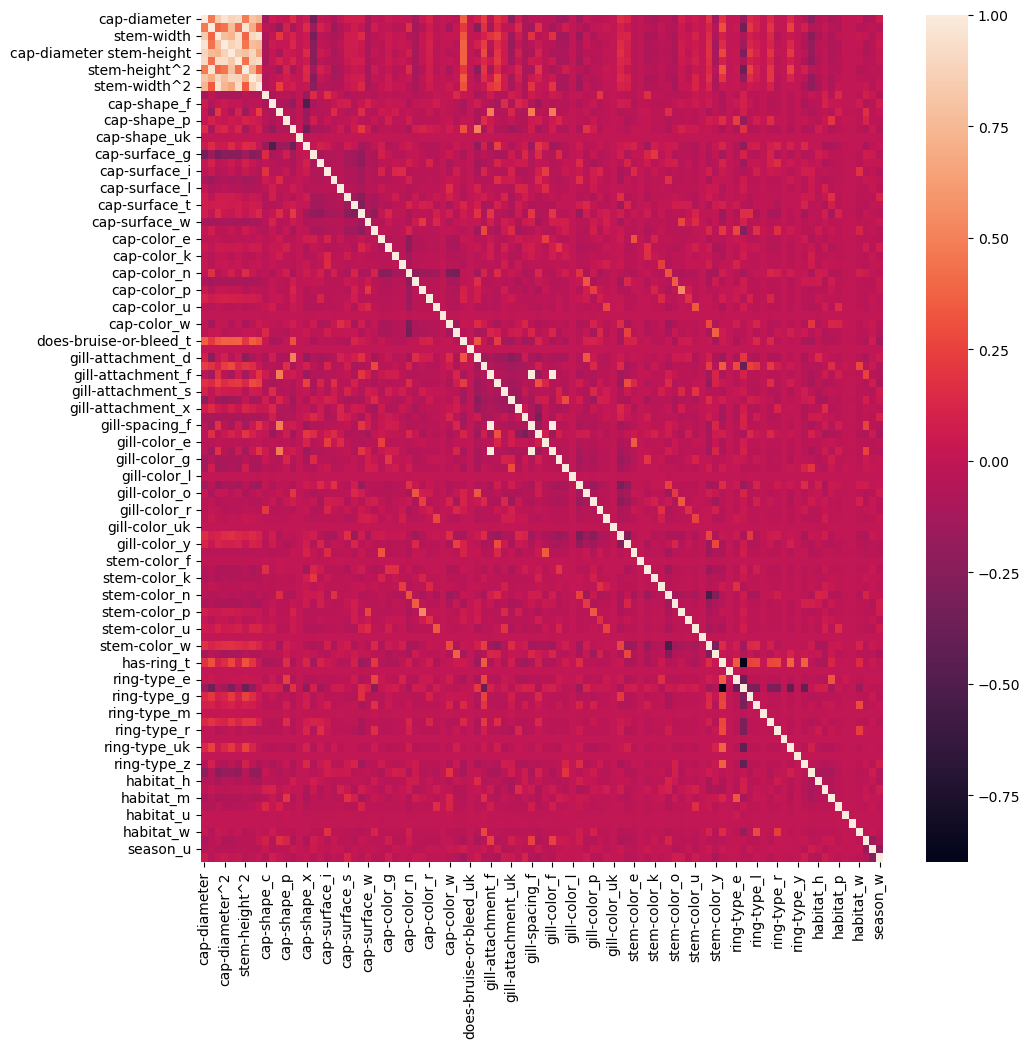

In [82]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [83]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features = correlation(X_train, 0.80)
cf = list(corr_features)

In [85]:
cf

['gill-spacing_f',
 'cap-diameter^2',
 'stem-width',
 'stem-height stem-width',
 'stem-width^2',
 'ring-type_f',
 'stem-height^2',
 'gill-color_f',
 'cap-diameter stem-height',
 'cap-diameter stem-width']

In [86]:
X_train.drop(cf,axis=1,inplace=True)
X_test.drop(cf,axis=1,inplace=True)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

### Model Training

In [91]:
model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    device='gpu',  
    gpu_use_dp=True 
)


param_distributions = {
    'n_estimators': [50, 100, 150, 200], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 6, 10],  
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0] 
}


random_search = RandomizedSearchCV(
    model, 
    param_distributions, 
    n_iter=10, 
    cv=5,  
    scoring='accuracy', 
    verbose=3, 
    random_state=42 
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 89
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.054114 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542151 -> initscore=0.169006
[LightGBM] [Info] Start training from score 0.169006
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.8;, score=0.911 total time=  15.4s
[LightGBM] [Info] Number of positive: 871046, number of negati

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.711 total time=   3.2s
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 89
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GP

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8;, score=0.800 total time=   6.6s
[LightGBM] [Info] Number of positive: 871045, number of negative: 735603
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.027106 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542151 -> initscore=0.169006
[LightGBM] [Info] Start training from score 0.169006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8;, score=0.890 total time=   3.1s
[LightGBM] [Info] Number of positive: 871045, number of negative: 735603
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 88
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.028186 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542150 -> initscore=0.169003
[LightGBM] [Info] Start training from score 0.169003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Info] Number of positive: 871045, number of negative: 735603
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 88
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.026083 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542150 -> initscore=0.169003
[LightGBM] [Info] Start training from score 0.169003
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=150, subsample=0.8;, score=0.911 total time=   8.0s
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.788 total time=   4.4s
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 89
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.027384 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542151 -> initscore=0.169006
[LightGBM] [Info] Start tr

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.784 total time=   4.5s
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 88
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.025319 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542151 -> initscore=0.169006
[LightGBM] [Info] Start training from score 0.169006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.787 total time=   4.1s
[LightGBM] [Info] Number of positive: 871045, number of negative: 735603
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 89
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.025740 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542150 -> initscore=0.169003
[LightGBM] [Info] Start training from score 0.169003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.787 total time=   3.7s
[LightGBM] [Info] Number of positive: 871045, number of negative: 735603
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 88
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.027566 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542150 -> initscore=0.169003
[LightGBM] [Info] Start tr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.784 total time=   4.3s
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 89
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.024706 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:Boos

[LightGBM] [Info] Number of positive: 871045, number of negative: 735603
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 1606648, number of used features: 88
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 16
[LightGBM] [Info] 8 dense feature groups (12.26 MB) transferred to GPU in 0.028200 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542150 -> initscore=0.169003
[LightGBM] [Info] Start training from score 0.169003
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0;, score=0.956 total time=   4.1s
[LightGBM] [Info] Number of positive: 871046, number of negative: 735602
[LightGBM] [Info] This is the GPU trainer!!
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(device='gpu', gpu_use_dp=True),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

### Model Performance 

In [92]:
y_pred = random_search.predict(X_test)

In [93]:
y_pred_train = random_search.predict(X_train)

In [94]:
accuracy_score(y_train,y_pred_train)

0.9862874755391349

In [95]:
accuracy_score(y_test,y_pred)

0.9862484823487723

In [96]:
confusion_matrix(y_test,y_pred)

array([[389211,   5320],
       [  6516, 459658]], dtype=int64)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    394531
           1       0.99      0.99      0.99    466174

    accuracy                           0.99    860705
   macro avg       0.99      0.99      0.99    860705
weighted avg       0.99      0.99      0.99    860705



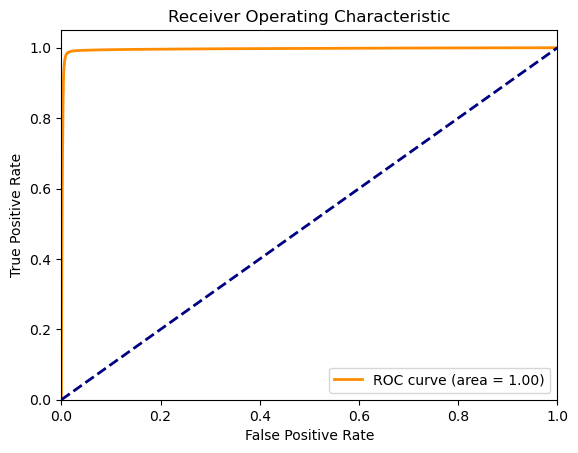

In [98]:
y_prob = random_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### test dataset

In [114]:
df_test = pd.read_csv('test.csv')

In [115]:
id_val = df_test['id']

In [116]:
df_test = df_test.drop(['veil-type','veil-color','spore-print-color','stem-root','stem-surface','id'],axis=1)

In [117]:
poly_df_test = add_polynomial_features(df_test, degree=2)

In [118]:
for column, valid_chars in detailed_values.items():
    valid_full_and_short = set(valid_chars.values()).union(set(valid_chars.keys()))
    mask = ~poly_df_test[column].isin(valid_full_and_short)
    poly_df_test.loc[mask, column] = 'uk'

In [119]:
for c in cat_col:
    uk_proportion = (poly_df_test[c] == "uk").sum() / len(poly_df_test)
    print(f'{c}: {uk_proportion:.2%}')

cap-shape: 0.02%
cap-surface: 28.15%
cap-color: 0.01%
does-bruise-or-bleed: 0.00%
gill-attachment: 16.85%
gill-spacing: 40.41%
gill-color: 0.01%
stem-color: 0.01%
has-ring: 0.01%
ring-type: 4.16%
habitat: 0.01%
season: 0.00%


In [120]:
poly_df_test.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-spacing                0
gill-color                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
cap-diameter                0
stem-height                 0
stem-width                  0
cap-diameter^2              0
cap-diameter stem-height    0
cap-diameter stem-width     0
stem-height^2               0
stem-height stem-width      0
stem-width^2                0
dtype: int64

In [121]:
# cat_col = poly_df_test.select_dtypes(include='object').columns
# for column in cat_col:
#     poly_df_test[column] = imputer.fit_transform(poly_df_test[[column]].values.reshape(-1, 1)).ravel()

In [122]:
cat_col = [col for col in poly_df_test.select_dtypes(include='object').columns]

one_hot_encoded_df_test = pd.get_dummies(poly_df_test, columns=cat_col, drop_first=True)

poly_df_test = one_hot_encoded_df_test

In [123]:
X_test_data = poly_df_test.astype(int)

In [124]:
X_test_data

,cap-diameter,stem-height,stem-width,cap-diameter^2,cap-diameter stem-height,cap-diameter stem-width,stem-height^2,stem-height stem-width,stem-width^2,cap-shape_c,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_uk,habitat_w,season_s,season_u,season_w
0,8,11,17,74,96,147,123,190,293,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,10,47,8,74,1,13,115,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,3,4,12,6,38,19,9,0,...,0,0,0,0,0,0,0,1,0,0
3,3,4,8,12,17,29,24,42,72,0,...,0,0,0,0,0,0,0,0,1,0
4,6,6,13,38,41,84,45,92,187,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0,2,1,0,2,1,7,3,1,0,...,0,0,0,0,0,0,0,0,1,0
2077960,3,2,7,9,8,23,7,19,54,0,...,0,0,0,0,0,0,0,0,0,0
2077961,5,6,9,32,35,55,37,59,94,0,...,0,0,0,0,0,0,0,0,0,0
2077962,5,6,3,25,30,17,36,20,11,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X_test_data.drop(cf,axis=1,inplace=True);

In [126]:
X_test_data = scaler.fit_transform(X_test_data)

In [127]:
X_test_data.shape

(2077964, 90)

In [128]:
X_train.shape

(2008310, 90)

In [129]:
y_pred = random_search.predict(X_test_data)

In [130]:
for index, class_label in enumerate(label.classes_):
    print(f"Value {index}: {class_label}")

Value 0: e
Value 1: p


In [131]:
y_pred_labels = label.inverse_transform(y_pred)

In [132]:
y_pred_df = pd.DataFrame(y_pred_labels)

In [133]:
results_df = pd.DataFrame({
    'id': id_val,
    'class': y_pred_labels
})

In [134]:
results_df.to_csv('mushroom_predictions.csv',index=False)